In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.inspection import inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Msmt = Base.classes.measurement
Stn = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
header = session.query(Msmt).first()
header.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24934fe04c0>,
 'date': '2010-01-01',
 'tobs': 18.3,
 'id': 0,
 'station': 'USC00519397',
 'prcp': 2.0}

In [10]:
header2 = session.query(Stn).first()
header2.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24935023280>,
 'latitude': 21.2716,
 'id': 0,
 'elevation': 0.914,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [11]:
count = session.query(Msmt).count()
count

19550

In [12]:
# Find the most recent date in the data set.
last_date = engine.execute('SELECT max(measurement.date) from measurement') 
for record in last_date:
    print(record)

('2017-08-23',)


In [32]:
#Using that date, get the previous 12 months of precipitation data by querying the previous 12 months of data.
# Select only the "date" and "prcp" values.
last_year_1 = session.query(Msmt.prcp, Msmt.date).\
    filter(Msmt.date > '2016-08-22').\
    order_by(Msmt.date).all()
       
last_year_df=pd.DataFrame(last_year_1)
last_year_df
#last_year_df.set_index('date')  

,prcp,date
0,0.0,2016-08-23
1,3.8,2016-08-23
2,1.3,2016-08-23
3,NaN,2016-08-23
4,0.5,2016-08-23
...,...,...
2225,12.7,2017-08-22
2226,0.0,2017-08-23
2227,0.0,2017-08-23
2228,2.0,2017-08-23


In [33]:
last_year_df['date']

0       2016-08-23
1       2016-08-23
2       2016-08-23
3       2016-08-23
4       2016-08-23
           ...    
2225    2017-08-22
2226    2017-08-23
2227    2017-08-23
2228    2017-08-23
2229    2017-08-23
Name: date, Length: 2230, dtype: object

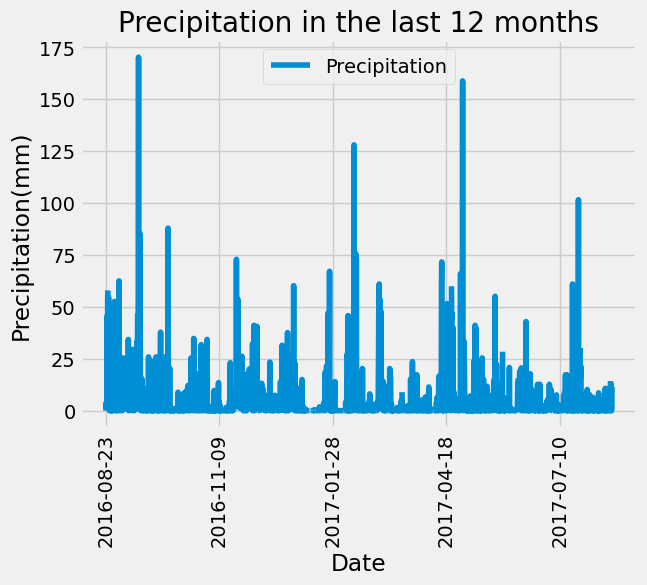

In [35]:
#Plot the results by using the DataFrame plot method
last_year_df.plot('date', 'prcp')
plt.xlabel('Date')
plt.ylabel('Precipitation(mm)')
plt.title('Precipitation in the last 12 months')
plt.legend(["Precipitation"])
plt.xticks(rotation=90)
plt.show(block=True)

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipt = engine.execute('SELECT measurement.prcp from measurement')
precipt_2 = [x for x in precipt]
precipt_3 = pd.DataFrame(precipt_2)
precipt_3.describe()   

,prcp
count,18103.000000
mean,4.083920
std,11.905419
min,0.000000
25%,0.000000
50%,0.300000
75%,2.800000
max,292.900000


In [18]:
session.close()

# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(Stn.id).distinct().count()
print(total_station)

9


In [20]:
ct=0
station_names = session.query(Stn.station)
for name in station_names:
    print(f"The "+str(ct+1)+"th name of the stations is "+str(name))
    ct +=1

The 1th name of the stations is ('USC00519397',)
The 2th name of the stations is ('USC00513117',)
The 3th name of the stations is ('USC00514830',)
The 4th name of the stations is ('USC00517948',)
The 5th name of the stations is ('USC00518838',)
The 6th name of the stations is ('USC00519523',)
The 7th name of the stations is ('USC00519281',)
The 8th name of the stations is ('USC00511918',)
The 9th name of the stations is ('USC00516128',)


In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_list = session.query(Msmt.station, func.count(Msmt.station)).\
    group_by(Msmt.station).\
    order_by(func.count(Msmt.station).desc()).all()
stations_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_temp = session.query(func.max(Msmt.tobs)).\
    filter(Msmt.station == 'USC00519281').\
    order_by(func.max(Msmt.tobs).desc()).all()    
print(f'The maximum temperature recorded in the most active station was {max_temp[0][0]}')
min_temp = session.query(func.min(Msmt.tobs)).\
    filter(Msmt.station == 'USC00519281').\
    order_by(func.min(Msmt.tobs).desc()).all()    
print(f'The minimum temperature recorded in the most active station was {min_temp[0][0]}')
avg_temp = session.query(func.avg(Msmt.tobs)).\
    filter(Msmt.station == 'USC00519281').\
    order_by(func.avg(Msmt.tobs).desc()).all()
print(f'The average temperature recorded in the most active station was '+ str(round(avg_temp[0][0],3)))

The maximum temperature recorded in the most active station was 29.4
The minimum temperature recorded in the most active station was 12.2
The average temperature recorded in the most active station was 22.036


In [23]:
avg_temp[0][0]

22.03582251082252

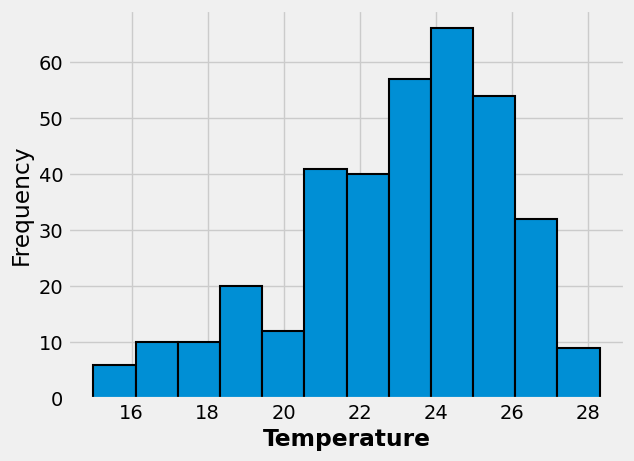

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year = session.query(Msmt.tobs).\
   filter(Msmt.date > '2016-08-17',
   Msmt.station == 'USC00519281').all()
last_year_data = [x for x in last_year]
last_year_2 = pd.DataFrame(last_year_data)
last_year_2.count()
plt.hist(last_year_2, edgecolor='black', linewidth=1.5, rwidth=2, bins=12)
plt.xlabel("Temperature", weight='bold')
plt.ylabel("Frequency")
plt.show()


# Close session

In [25]:
# Close Session
session.close()